<a href="https://colab.research.google.com/github/Harikrishna011/ML_FakeNews/blob/main/FakeNewsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
true = pd.read_csv('/content/drive/MyDrive/FakeNews/True.csv')

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/FakeNews/Fake.csv')

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true['label'] = 1

In [ ]:
fake['label'] = 0

In [ ]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news = pd.concat([fake, true], axis = 0)

In [ ]:
news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
news = news.drop(['title', 'subject', 'date'],axis=1)

In [ ]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news = news.sample(frac=1)

In [ ]:
news.reset_index(inplace=True)

In [ ]:
news.drop(['index'],axis=1, inplace = True)

In [ ]:
import re
def wordopt(text):
  # Convert into lowercase
  text = text.lower()

  # Remove URLs
  text = re.sub(r'http?://\S+\www\.\S+', '', text)

  # Remove HTML tags
  text = re.sub(r'<.*?>', '', text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Remove digits
  text = re.sub(r'\d', '', text)

  # Remove newline characters
  text = re.sub(r'\n', ' ', text)

  return text

In [ ]:
news['text'] = news['text'].apply(wordopt)

In [ ]:
x = news['text']
y = news['label']

In [ ]:
x

,text
0,bangkok reuters thailand bade a final goodbye...
1,miss universe alicia machado is now an americ...
2,it s a trap that s the messaging that the tr...
3,in case you haven t heard about the nasty emin...
4,barack obama eric holder al sharpton hillary c...
...,...
44893,cox s bazar bangladesh reuters an estimated ...
44894,there are people out there who are giving the...
44895,this is priceless the video below shows just h...
44896,priorities priorities arizona sen john mccain ...


In [ ]:
y

,label
0,1
1,0
2,0
3,0
4,0
...,...
44893,1
44894,0
44895,0
44896,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train.shape,x_test.shape

((31428,), (13470,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
pred_lr

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
LR.score(xv_test, y_test)

0.9884929472902747

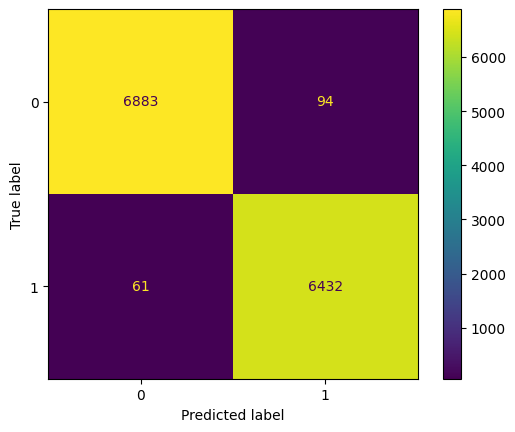

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,pred_lr)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dtc = DTC.predict(xv_test)

In [ ]:
pred_dtc

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
DTC.score(xv_test, y_test)

0.9961395694135116

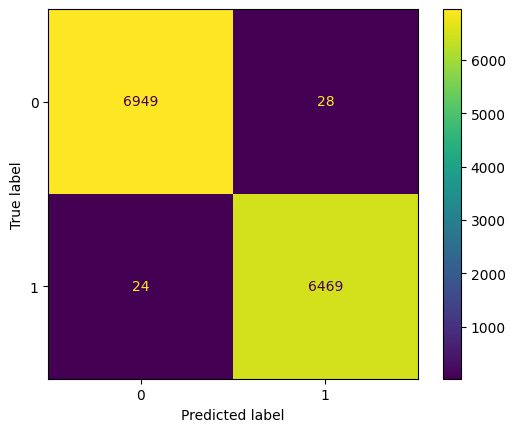

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,pred_dtc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [ ]:
predict_rfc = rfc.predict(xv_test)
rfc.score(xv_test, y_test)

0.9867112100965107

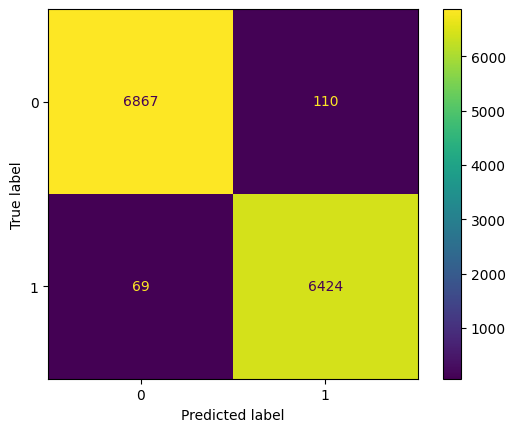

In [41]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,predict_rfc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [42]:

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [43]:
pred_gbc = gbc.predict(xv_test)
gbc.score(xv_test, y_test)

0.9945805493689681

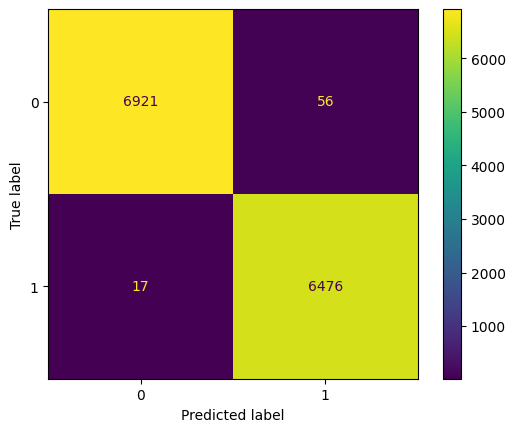

In [44]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test,pred_gbc)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [45]:
def output_label(n):
  if n==0:
    return "It is a Fake News"
  elif n == 1:
    return "It is a Genuine News"

In [46]:
def manual_testing(news):
  testing_news = {"text":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["text"] = new_def_test["text"].apply(wordopt)
  new_x_test = new_def_test["text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_lr = LR.predict(new_xv_test)
  pred_dtc = DTC.predict(new_xv_test)
  pred_rfc = rfc.predict(new_xv_test)
  pred_gbc = gbc.predict(new_xv_test)
  return "LR Prediction: {} | DTC Prediction: {} | RFC Prediction: {} | GBC Prediction: {}".format(
        output_label(pred_lr[0]),
        output_label(pred_dtc[0]),
        output_label(pred_rfc[0]),
        output_label(pred_gbc[0])
    )

In [58]:
news_article = str(input())

bangkok reuters thailand bade a final goodbye


In [59]:
manual_testing(news_article)

'LR Prediction: It is a Genuine News | DTC Prediction: It is a Genuine News | RFC Prediction: It is a Fake News | GBC Prediction: It is a Genuine News'